### Tasks
#### KDD Cup 2009: Customer relationship prediction
### Task Description
The task is to estimate the churn, appetency and up-selling probability of customers, hence there are three target values to be predicted. The challenge is staged in phases to test the rapidity with which each team is able to produce results. A large number of variables (15,000) is made available for prediction. However, to engage participants having access to less computing power, a smaller version of the dataset with only 230 variables will be made available in the second part of the challenge.

1. Churn (wikipedia definition): Churn rate is also sometimes called attrition rate. It is one of two primary factors that determine the steady-state level of customers a business will support. In its broadest sense, churn rate is a measure of the number of individuals or items moving into or out of a collection over a specific period of time. The term is used in many contexts, but is most widely applied in business with respect to a contractual customer base. For instance, it is an important factor for any business with a subscriber-based service model, including mobile telephone networks and pay TV operators. The term is also used to refer to participant turnover in peer-to-peer networks.
2. Appetency: In our context, the appetency is the propensity to buy a service or a product.
3. Up-selling (wikipedia definition): Up-selling is a sales technique whereby a salesman attempts to have the customer purchase more expensive items, upgrades, or other add-ons in an attempt to make a more profitable sale. Up-selling usually involves marketing more profitable services or products, but up-selling can also be simply exposing the customer to other options he or she may not have considered previously. Up-selling can imply selling something additional, or selling something that is more profitable or otherwise preferable for the seller instead of the original sale.

### Evaluation
The performances are evaluated according to the arithmetic mean of the AUC for the three tasks (churn, appetency. and up-selling). This is what we call "Score" in the Result page.

### Sensitivity and Specificity
The main objective of the challenge is to make good predictions of the target variables. The prediction of each target variable is thought of as a separate classification problem. The results of classification, obtained by thresholding the prediction score, may be represented in a confusion matrix, where tp (true positive), fn (false negative), tn (true negative) and fp (false positive) represent the number of examples falling into each possible outcome:


Any sort of numeric prediction score is allowed, larger numerical values indicating higher confidence in positive class membership.

We define the sensitivity (also called true positive rate or hit rate) and the specificity (true negative rate) as:

* Sensitivity = tp/pos
* Specificity = tn/neg

where pos = tp+fn is the total number of positive examples and neg=tn+fp the total number of negative examples.

### AUC
The results will be evaluated with the so-called Area Under Curve (AUC). It corresponds to the area under the curve obtained by plotting sensitivity against specificity by varying a threshold on the prediction values to determine the classification result. The AUC is related to the area under the lift curve and the Gini index used in marketing (Gini = 2 AUC -1). The AUC is calculated using the trapezoid method. In the case when binary scores are supplied for the classification instead of discriminant values, the curve is given by {(0,1), (tn/(tn+fp), tp/(tp+fn)), (1,0)} and the AUC is just the Balanced ACcuracy BAC.

In [19]:
## Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

In [8]:
#Load data
traindf = pd.read_csv(filepath_or_buffer="./orange_small_train.data",sep='\t')
traindf.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN


In [15]:
traindf['churn'] = pd.read_csv("./orange_large_train_churn.labels.csv", header=None)
traindf['appetency'] = pd.read_csv("./orange_small_train_appetency.labels.csv", header=None)
traindf['upselling'] = pd.read_csv("./orange_small_train_upselling.labels.csv", header=None)

In [16]:
traindf.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var224,Var225,Var226,Var227,Var228,Var229,Var230,churn,appetency,upselling
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,-1,-1,-1
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN,-1,-1,-1
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN,-1,-1,-1
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN,-1,-1,-1
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN,1,-1,-1


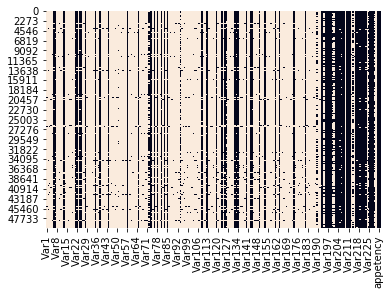

In [23]:
#heatmap to visualize missing values across columns
sns.heatmap(traindf.isnull(),cbar=False)

clearly shows 3/4 columns contain mostly null values

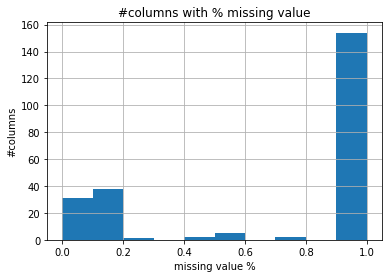

In [43]:
#missing value analysis
col_with_mis_val_percentage = traindf.isnull().sum()/traindf.shape[0]
plt.hist(col_with_mis_val_percentage)
plt.title('#columns with % missing value')
plt.xlabel('missing value %')
plt.ylabel('#columns')
plt.grid()
plt.show()

shows there are 154 columns have atleast 90% missing values

In [45]:
#check dimension/shape of train df
traindf.shape

(50000, 233)

There are 50k observations and 230 features and other 3 are target features i.e. churn, appetency and upselling